In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

**Step 1: Load and Inspect the Dataset**

In [2]:
# Load dataset
df = pd.read_csv('/content/BRITANNIA.csv')

In [3]:
# Display first few rows
print(df.head())

         Date     Symbol Series  Prev Close   Open    High    Low   Last  \
0  2000-01-03  BRITANNIA     EQ      703.25  705.0  759.50  705.0  758.0   
1  2000-01-04  BRITANNIA     EQ      756.90  710.0  770.00  710.0  740.0   
2  2000-01-05  BRITANNIA     EQ      754.55  755.0  759.00  705.0  740.0   
3  2000-01-06  BRITANNIA     EQ      735.30  740.0  794.15  740.0  770.0   
4  2000-01-07  BRITANNIA     EQ      785.65  808.0  848.50  798.0  848.5   

    Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  756.90  741.01    7512  5.566488e+11     NaN                 NaN   
1  754.55  742.52    8135  6.040391e+11     NaN                 NaN   
2  735.30  739.92    6095  4.509784e+11     NaN                 NaN   
3  785.65  788.83   19697  1.553756e+12     NaN                 NaN   
4  848.50  827.53   33107  2.739708e+12     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


In [4]:
# Display basic statistics
print(df.describe())

        Prev Close         Open         High          Low         Last  \
count  5305.000000  5305.000000  5305.000000  5305.000000  5305.000000   
mean   1687.974769  1690.173054  1713.527135  1665.679293  1688.601112   
std    1364.834888  1367.095820  1379.848544  1350.727532  1365.080043   
min     336.350000   340.000000   347.700000   295.200000   336.950000   
25%     591.800000   594.500000   603.900000   580.200000   592.500000   
50%    1230.150000  1230.000000  1259.000000  1203.350000  1230.000000   
75%    2743.700000  2741.050000  2778.400000  2701.100000  2747.000000   
max    6900.150000  6918.000000  6934.350000  6831.700000  6898.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count  5305.000000  5305.000000  5.305000e+03  5.305000e+03    2456.000000   
mean   1688.492347  1689.630878  1.220883e+05  3.531071e+13   19243.627850   
std    1364.982005  1365.360931  2.668956e+05  9.119291e+13   22420.581857   
min     336.350000   

In [5]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5305 non-null   object 
 1   Symbol              5305 non-null   object 
 2   Series              5305 non-null   object 
 3   Prev Close          5305 non-null   float64
 4   Open                5305 non-null   float64
 5   High                5305 non-null   float64
 6   Low                 5305 non-null   float64
 7   Last                5305 non-null   float64
 8   Close               5305 non-null   float64
 9   VWAP                5305 non-null   float64
 10  Volume              5305 non-null   int64  
 11  Turnover            5305 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4796 non-null   float64
 14  %Deliverble         4796 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.8

In [7]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5300,2021-04-26,BRITANNIA,EQ,3650.30,3661.10,3662.00,3531.0,3546.0,3539.20,3558.62,1031406,3.670382e+14,72258.0,507276.0,0.4918
5301,2021-04-27,BRITANNIA,EQ,3539.20,3572.70,3574.60,3517.0,3546.0,3541.20,3539.42,813608,2.879697e+14,46189.0,322686.0,0.3966
5302,2021-04-28,BRITANNIA,EQ,3541.20,3488.00,3527.00,3469.0,3470.0,3478.75,3495.13,1498181,5.236339e+14,97170.0,763715.0,0.5098
5303,2021-04-29,BRITANNIA,EQ,3478.75,3496.75,3505.90,3447.0,3464.0,3468.90,3471.18,611087,2.121195e+14,41655.0,309653.0,0.5067
5304,2021-04-30,BRITANNIA,EQ,3468.90,3460.00,3468.35,3437.0,3444.8,3449.00,3450.52,436187,1.505071e+14,34606.0,208365.0,0.4777


In [8]:
df.shape

(5305, 15)

**Step 2: Exploratory Data Analysis (EDA)**

In [9]:
# Check for missing values
print(df.isnull().sum())

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2849
Deliverable Volume     509
%Deliverble            509
dtype: int64


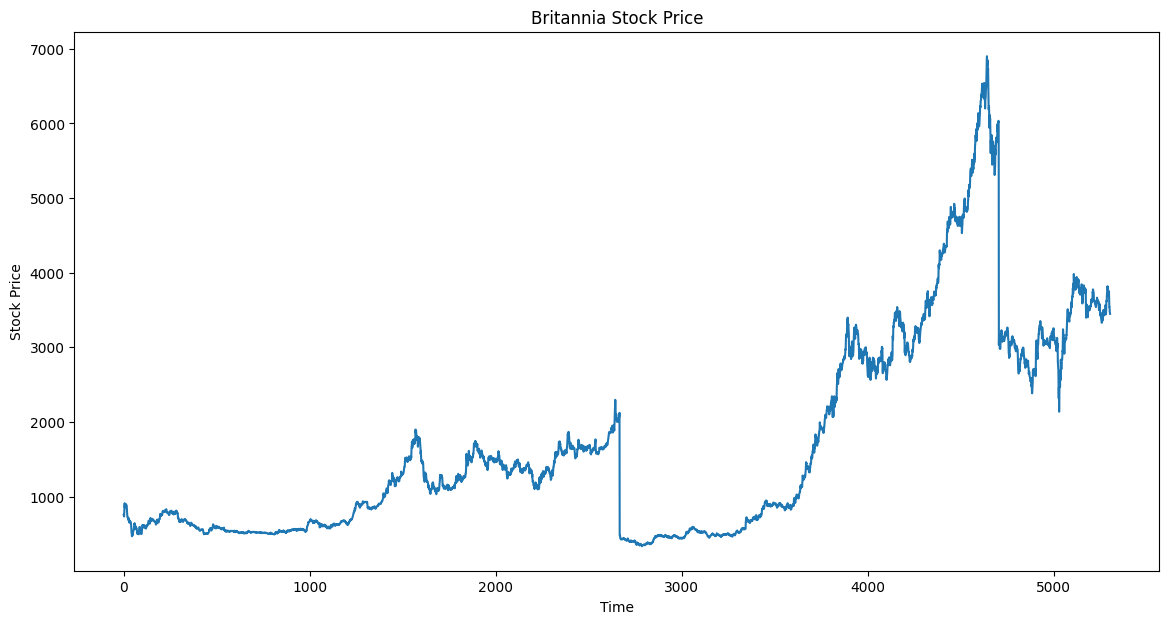

In [10]:
# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('Britannia Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [11]:
# Data Preprocessing for all models
# Filling missing values (if any)
df.fillna(method='ffill', inplace=True)

In [12]:
# Feature selection and scaling
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

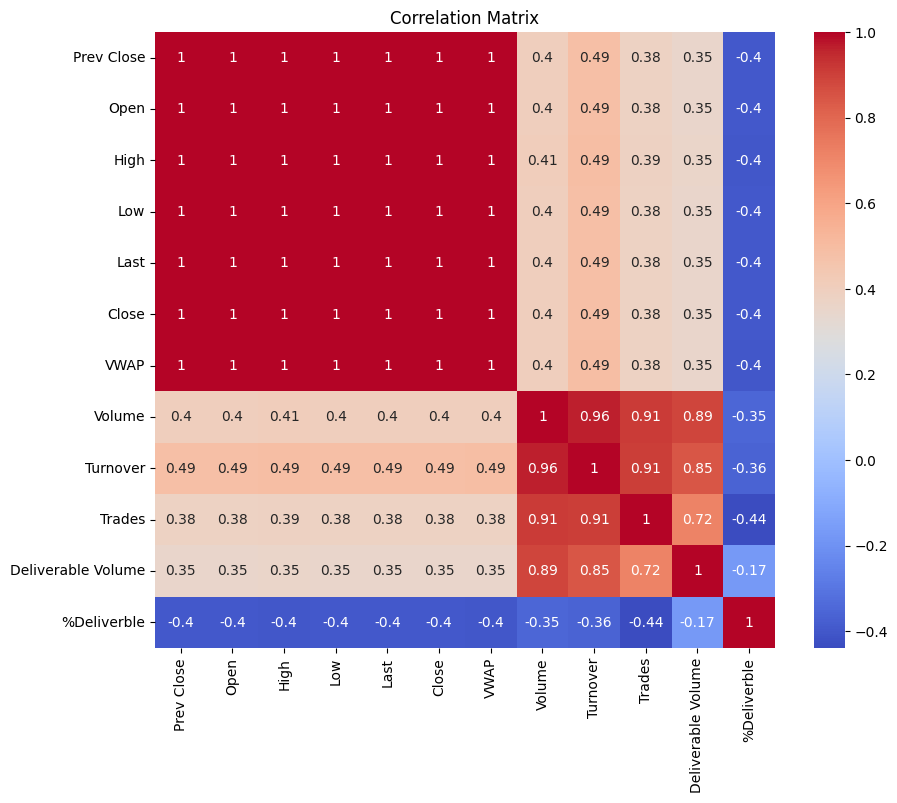

In [13]:
# Select only numeric columns before calculating the correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

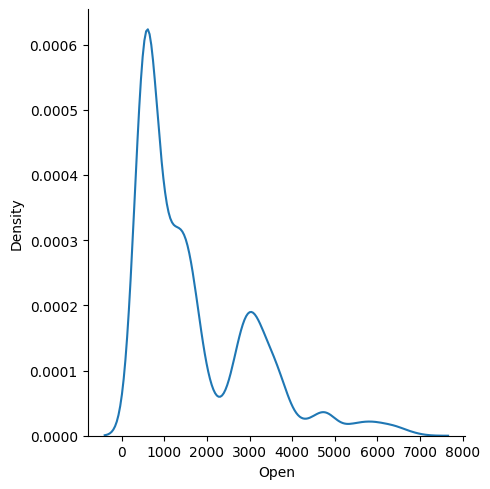

In [14]:
#Open Stock Price According to their density
sns.displot(df["Open"], kind="kde")

<Axes: xlabel='Prev Close', ylabel='High'>

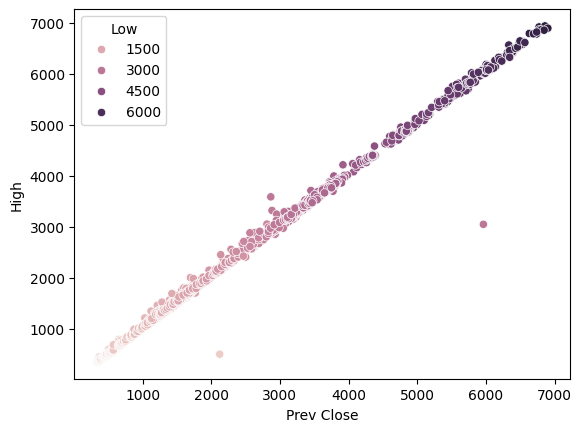

In [16]:
# About The Adj Close , High and low Stock prices
sns.scatterplot(x="Prev Close",y="High",hue="Low",data=df)

array([[<Axes: title={'center': 'Prev Close'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Last'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'VWAP'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Turnover'}>],
       [<Axes: title={'center': 'Trades'}>,
        <Axes: title={'center': 'Deliverable Volume'}>,
        <Axes: title={'center': '%Deliverble'}>]], dtype=object)

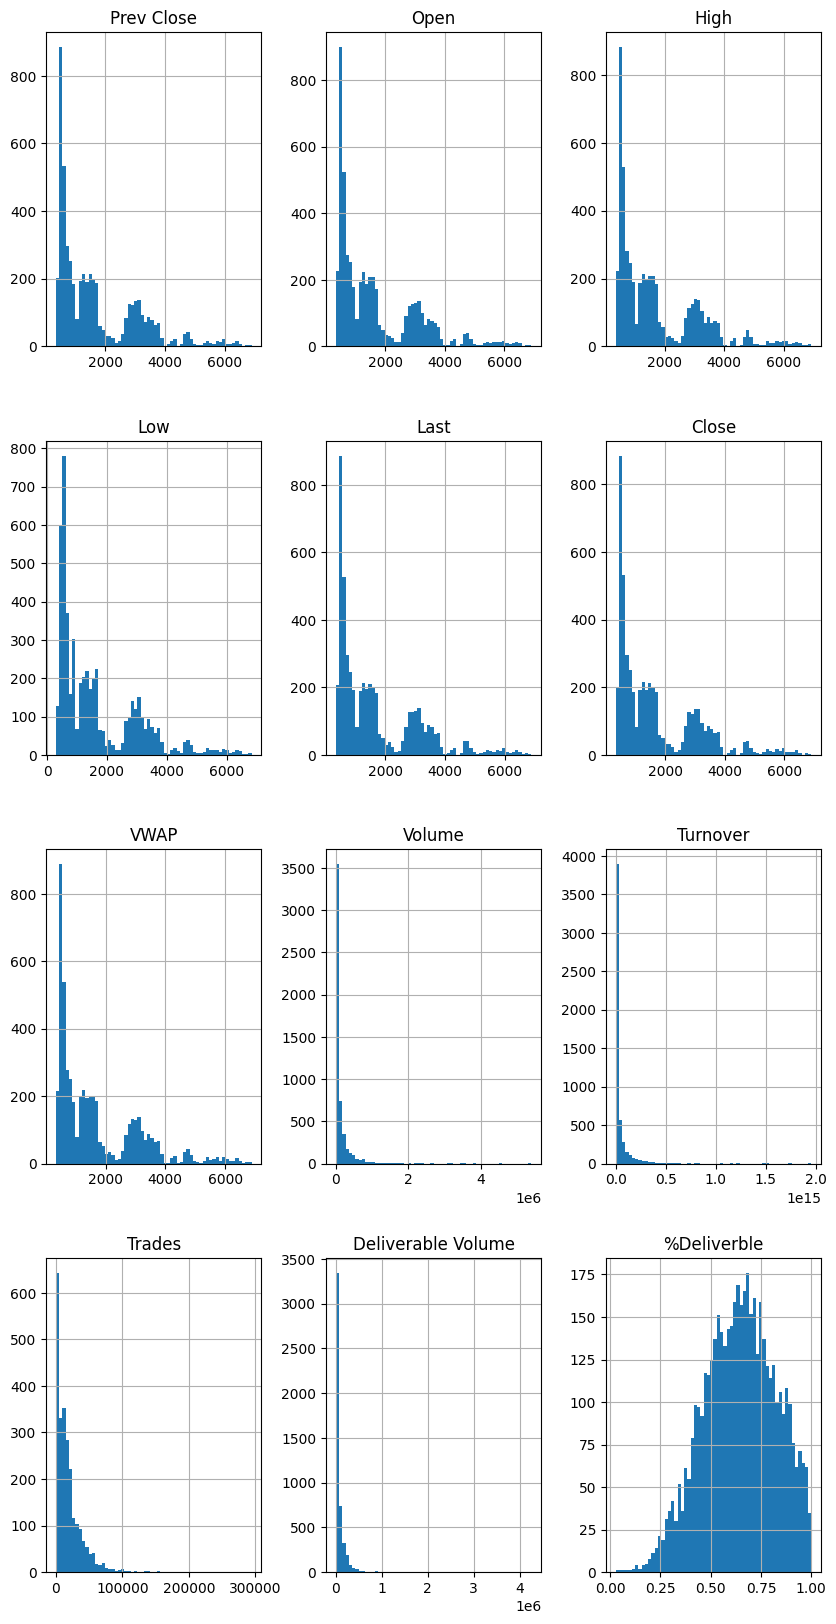

In [17]:
#Make Histogram of All Data set

df.hist(bins=60,figsize=(10,20))

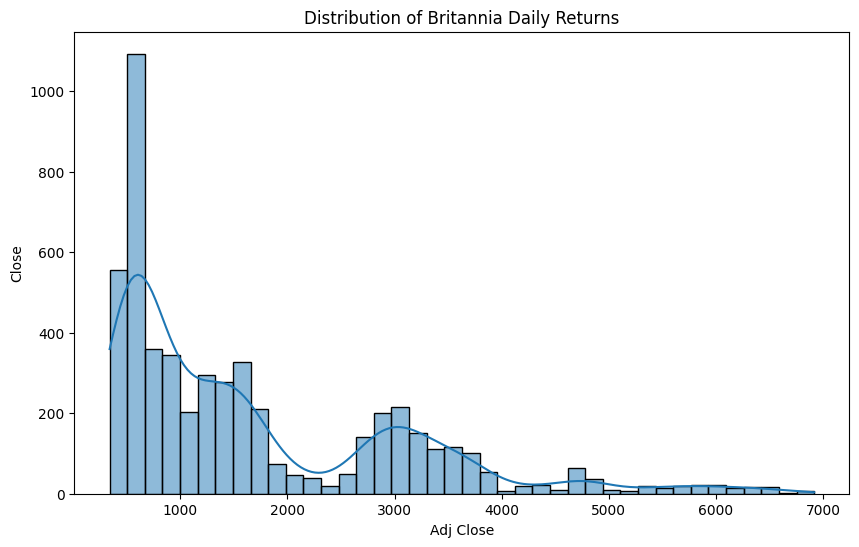

In [18]:
# This Plotation on Stock prices When on Close , Adjacent Close and on Open Stages .

plt.figure(figsize=(10, 6))
sns.histplot(df['Open'].dropna(), bins=40, kde=True)
plt.title('Distribution of Britannia Daily Returns')
plt.xlabel('Adj Close')
plt.ylabel('Close')
plt.show()

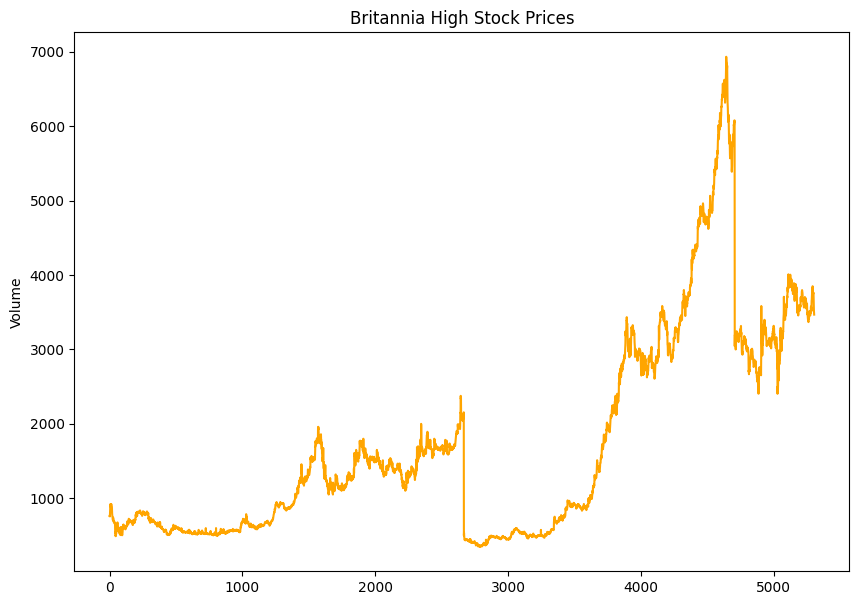

In [19]:
# Plot Britannia High Stock Prices

def volume_analysis(df,cmp_name):
    df['High'].plot(figsize=(10,7),title='Britannia '+cmp_name+' Stock Prices',c='orange')
    plt.ylabel('Volume')
    plt.show()

volume_analysis(df,'High')

In [20]:
import tensorflow as tf
print(tf.__version__)

2.15.0


**Step 3: split the dataset into training and testing sets**


In [21]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Defining a function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'MSE: {mse}')
    print(f'R2 Score: {r2}')
    return predictions

**Step 4: Comparing and Predicting with differnt Models**

 **Linear Regression Model**

In [23]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [24]:
# Evaluating Linear Regression Model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}, R2: {r2_lr}")

Linear Regression MSE: 250.4048364184735, R2: 0.9998721541606618


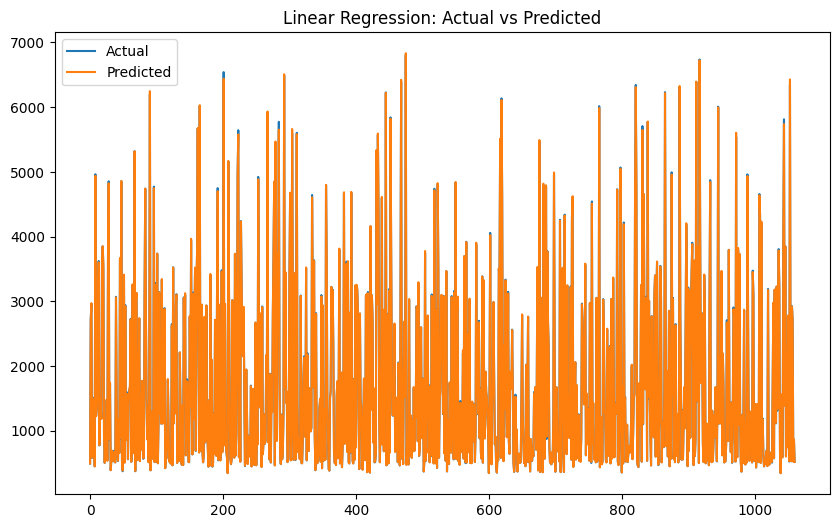

In [25]:
# Plotting actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lr, label='Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

**Support Vector Machine (SVM) Model**

In [26]:
# Support Vector Machine (SVM) Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

In [28]:
# Evaluating SVM Model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print(f"SVM MSE: {mse_svm}, R2: {r2_svm}")

SVM MSE: 811698.14662369, R2: 0.5855821623549878


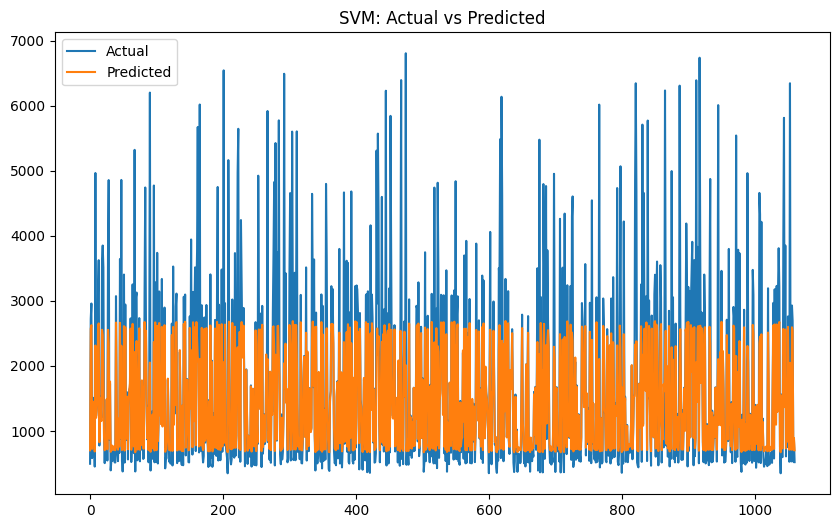

In [29]:
# Plotting actual vs predicted values for SVM
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_svm, label='Predicted')
plt.title('SVM: Actual vs Predicted')
plt.legend()
plt.show()

**K-means Clustering**

In [30]:
# K-means Clustering (for understanding stock trends)
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


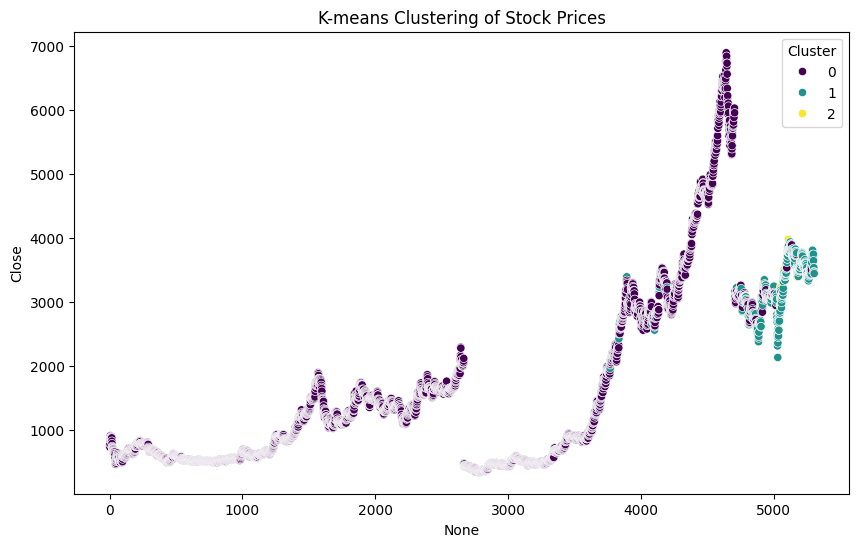

In [31]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y='Close', hue='Cluster', data=df, palette='viridis')
plt.title('K-means Clustering of Stock Prices')
plt.show()

In [32]:
# Using cluster centroids as additional features for Linear Regression
df['Cluster'] = kmeans.fit_predict(X)
cluster_centers = kmeans.cluster_centers_
df['Cluster_Centroid'] = df['Cluster'].map(lambda x: cluster_centers[x][0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
# Convert the 'Symbol' column to a numerical representation (e.g., one-hot encoding)
X = pd.get_dummies(df.drop(columns=['Close', 'Date']), columns=['Symbol'], drop_first=True)

# Explicitly convert all columns in X to numeric, handling errors
X = X.apply(pd.to_numeric, errors='coerce')

# Fill missing values (NaNs) with a suitable strategy (e.g., mean)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Choose a strategy that suits your data
X = imputer.fit_transform(X)

# Split the data into training and testing sets (using the updated X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
lr_model_with_cluster = LinearRegression()
lr_model_with_cluster.fit(X_train, y_train)

# Predict using the model
y_pred_lr_cluster = lr_model_with_cluster.predict(X_test)

In [42]:
# Evaluating Linear Regression Model with Clusters
mse_lr_cluster = mean_squared_error(y_test, y_pred_lr_cluster)
r2_lr_cluster = r2_score(y_test, y_pred_lr_cluster)
print(f"Linear Regression with Clusters MSE: {mse_lr_cluster}, R2: {r2_lr_cluster}")

Linear Regression with Clusters MSE: 35.83358087275958, R2: 0.9999817049291512


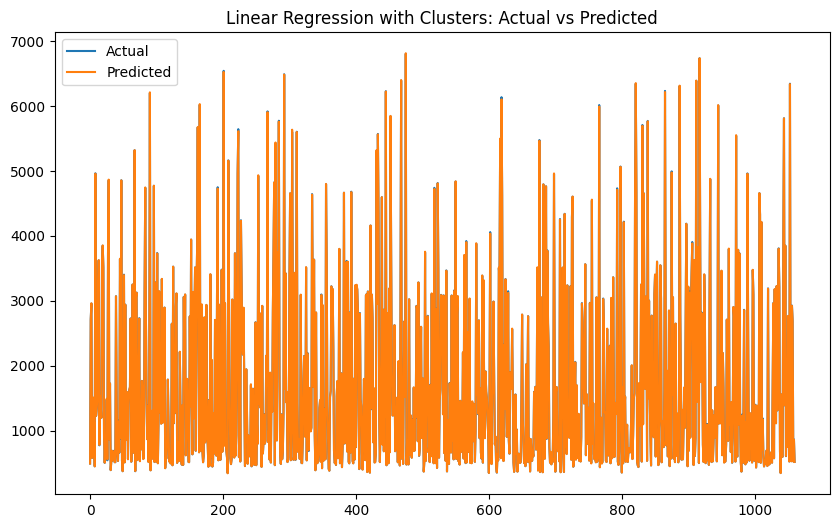

In [43]:
# Plotting actual vs predicted values for Linear Regression with Clusters
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lr_cluster, label='Predicted')
plt.title('Linear Regression with Clusters: Actual vs Predicted')
plt.legend()
plt.show()